## Problem Statement

Task 1 : Prepare a complete data analysis report on the given data.

Task 2 : Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

Task 3 : Suggestions to the Hospital  to awake the predictions of heart diseases to prevent life threats.

### Heart Disease

-	Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Dataset
- slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
- thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
- resting_blood_pressure (type: int): resting blood pressure
- chest_pain_type (type: int): chest pain type (4 values)
- num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
- fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
- resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
- serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
- oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
- sex (type: binary): 0: female, 1: male
- age (type: int): age in years
- max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
- exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

  #### 7 categorical values in total as int, object and binary.

## Exploratory Data Analysis

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

In [244]:
# Loading and merging the datasets

values=pd.read_csv('values.csv')
labels=pd.read_csv('labels.csv')
data=pd.concat([values,labels],axis=1)


In [245]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


### Data Preprocessing
- Basic data checks
- Encoding categorical variables
- Finding missing values


In [247]:
data.shape

(180, 16)

In [248]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'patient_id',
       'heart_disease_present'],
      dtype='object')

In [249]:
#Identifying duplicated columns
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False])

In [250]:
#Removing Duplicated column 'patient_id'
data = data.loc[:, ~data.columns.duplicated(keep='first')]

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [252]:
#Statistical analysis of numerical columns
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [253]:
categorical_data=data.select_dtypes(include=['object','category']).columns
categorical_data

Index(['patient_id', 'thal'], dtype='object')

In [254]:
#Unique categorical values
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [255]:
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [256]:
data.chest_pain_type.value_counts()

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

In [257]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [258]:
categorical_col=['thal','slope_of_peak_exercise_st_segment','chest_pain_type',
                 'resting_ekg_results','sex','fasting_blood_sugar_gt_120_mg_per_dl','exercise_induced_angina',
                 'num_major_vessels']

In [259]:
def display_unique(data,categorical_cols):
    for col in categorical_col:
        unique_vals=data[col].unique()
        print(f"\nColumn: {col}")
        print("Unique Values:", unique_vals)

display_unique(data,categorical_col)


Column: thal
Unique Values: ['normal' 'reversible_defect' 'fixed_defect']

Column: slope_of_peak_exercise_st_segment
Unique Values: [1 2 3]

Column: chest_pain_type
Unique Values: [2 3 4 1]

Column: resting_ekg_results
Unique Values: [2 0 1]

Column: sex
Unique Values: [1 0]

Column: fasting_blood_sugar_gt_120_mg_per_dl
Unique Values: [0 1]

Column: exercise_induced_angina
Unique Values: [0 1]

Column: num_major_vessels
Unique Values: [0 3 2 1]


In [260]:
data['thal'] = data['thal'].astype('category')


In [261]:
data['thal'] = data['thal'].astype(str)
data['thal'] = data['thal'].astype('category') 

In [262]:
#Initializing OneHotEncoder
encoder=OneHotEncoder(sparse=False,drop='first')

#Fit and transform thal col
thal_encoded=encoder.fit_transform(data[['thal']])

#Create a dataframe for the encoded columns
thal_encoded_data=pd.DataFrame(thal_encoded,columns=encoder.get_feature_names_out(['thal']))

#Combine with original dataframe
data_combined=pd.concat([data.reset_index(drop=True),thal_encoded_data.reset_index(drop=True)],axis=1)

#Drop original if needed
data_combined.drop('thal',axis=1,inplace=True)
data_combined.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1.0,0.0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1.0,0.0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1.0,0.0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0.0,1.0
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0.0,1.0


In [263]:
#finding missing values
data_combined.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
thal_normal                             0
thal_reversible_defect                  0
dtype: int64

In [264]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

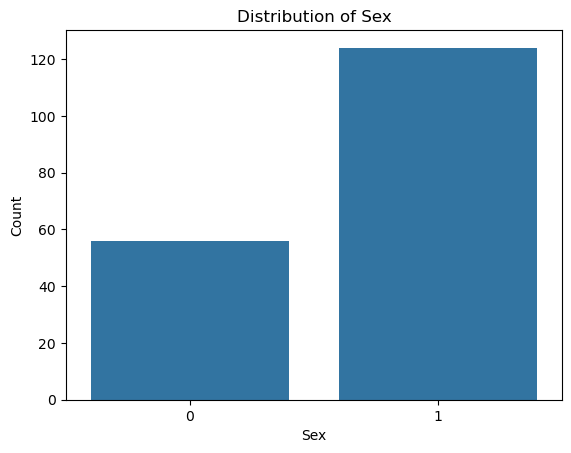

In [265]:
#Bar plot to analyse the frequency of categorical variables
#sex
sns.countplot(data=data_combined,x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

- The frequency of men in the population is more than double the amount of women, 

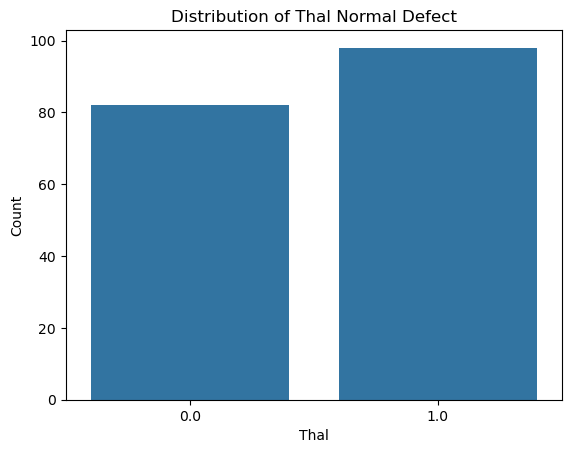

In [267]:
#Thal normal
sns.countplot(data=data_combined,x='thal_normal')
plt.title('Distribution of Thal Normal Defect')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.show()



- The patient group has slightly higher normal thal defect indicating comparatively healthy population

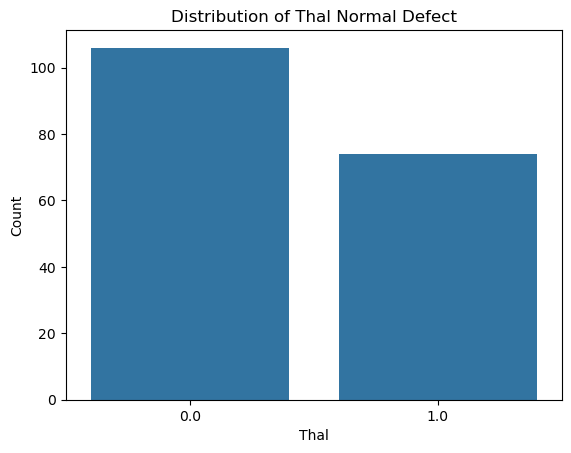

In [269]:

sns.countplot(data=data_combined,x='thal_reversible_defect')
plt.title('Distribution of Thal Normal Defect')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.show()


- The high count for '0' indicates the majority of patients' condition does not improve or reverse based on the thallium stress test

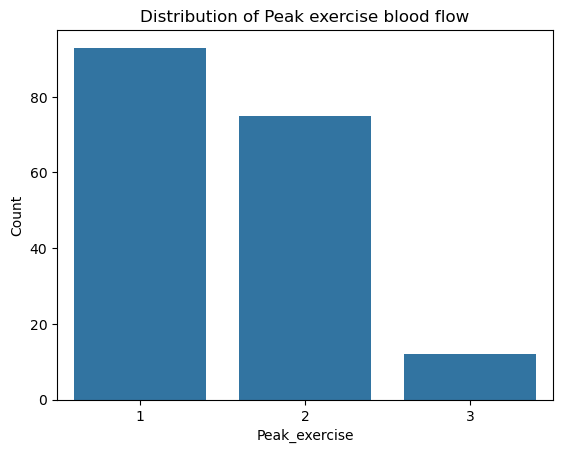

In [271]:
#peak_exercise_st_segment

sns.countplot(data=data_combined,x='slope_of_peak_exercise_st_segment')
plt.title('Distribution of Peak exercise blood flow')
plt.xlabel('Peak_exercise')
plt.ylabel('Count')
plt.show()

- Slope of 1, 2 and 3 corresponds to up, flat and down slope.
- Since the frequency of Up slop is higher, which corresponds to normal , it indicates that the majority of patients had their heart performing normally under stress.
-  Only very few , ie , less than 10 had down slope, which is a concerning factor deciding blood flow to the heart during stress. 

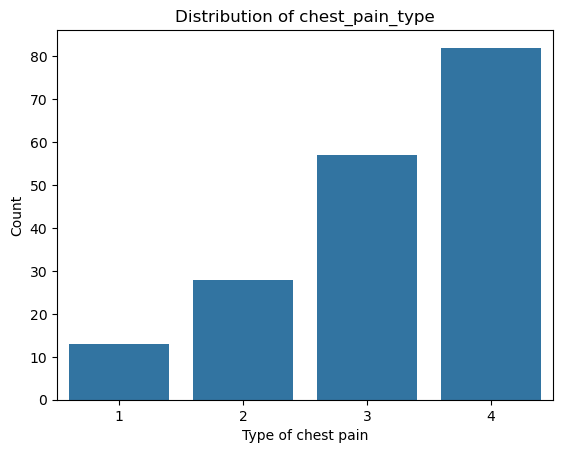

In [273]:
sns.countplot(data=data_combined,x='chest_pain_type')
plt.title('Distribution of chest_pain_type')
plt.xlabel('Type of chest pain')
plt.ylabel('Count')
plt.show()



- The 4 types corresponds to typical angina, atypical angina, non anginal pain, asymptomatic.
- According to domain analysis,typical angina signals that chest pain maybe related to heart disease due blockages in coronary artieries.
- Atypical angina and non anginal pain may be related to heart related disease or other non cardiac issues.
- Asymptomatic refers to people who may have heart disease but not necessarily chest pain, making it more dangerous.
- From the study population, majority of the candidates fall in asymptomatic category, raising the need for further detailed checkups, regular screening etc.
  

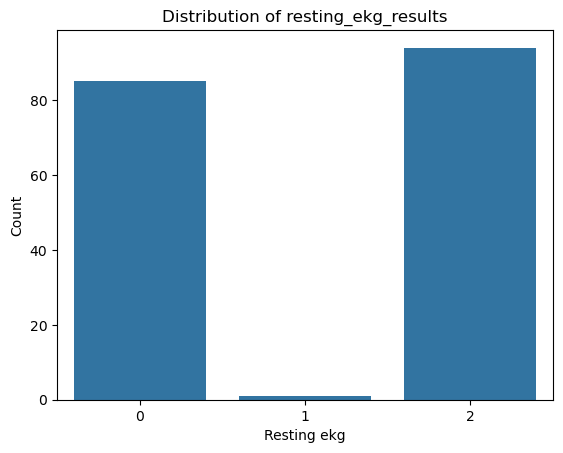

In [275]:
#Resting Ecg

sns.countplot(data=data_combined,x='resting_ekg_results')
plt.title('Distribution of resting_ekg_results')
plt.xlabel('Resting ekg')
plt.ylabel('Count')
plt.show()

- The resting ecg result indicate potential issues.
- 0 indicates normal, 1 indicates chances of heart condition,2 indicates presence of LVH, Left Ventricular Hypertrophy and increased risk.
- Majority of the population is having LVH, slighly higher than people with normal resting ekg value.

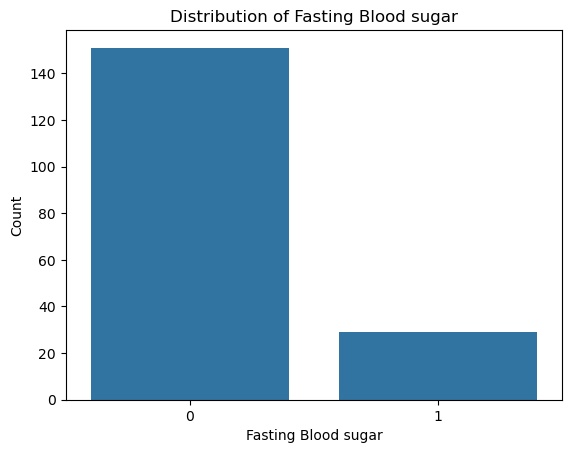

In [277]:
#fasting Blood Sugar
sns.countplot(data=data_combined,x='fasting_blood_sugar_gt_120_mg_per_dl')
plt.title('Distribution of Fasting Blood sugar')
plt.xlabel('Fasting Blood sugar')
plt.ylabel('Count')
plt.show()



-  0 indicates blood sugar level less than 120 mg/dl, which contributes to significant amount of people from the population.
-  1 indicates blood sugar level greater than 120 mg/dl indicating higher risk of diabetes and cardiovascular diseases.
  

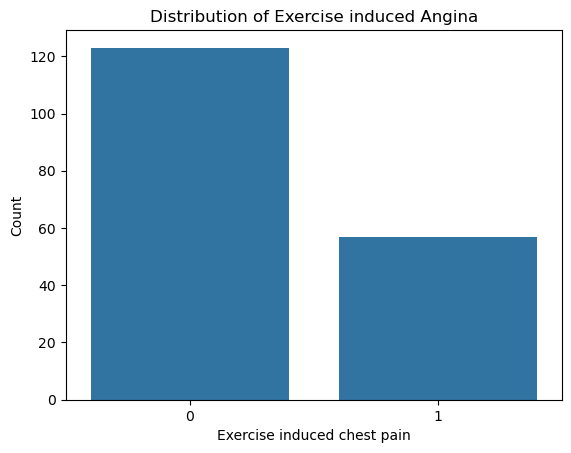

In [279]:
#exercise_induced_angina
sns.countplot(data=data_combined,x='exercise_induced_angina')
plt.title('Distribution of Exercise induced Angina')
plt.xlabel('Exercise induced chest pain')
plt.ylabel('Count')
plt.show()


- 0 indicates no major vessel visible which indicates higher risk of heart disease, consisting the majority of the population with more than 100 patients.
- 1,2,3 indicates risk of heart disease in decreasing order due to blockages or reduced blood flow to heart, which is comparatively higher

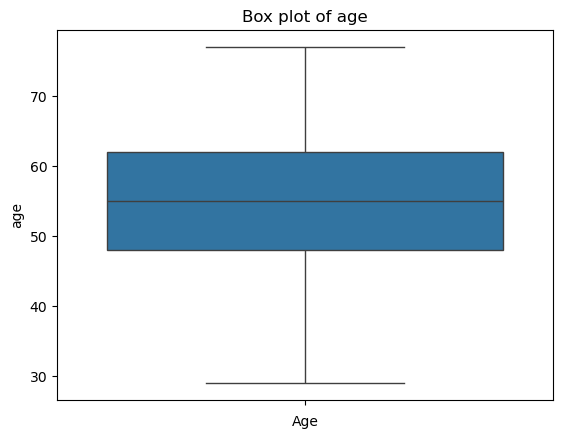

In [281]:
#Numerical Features
#Age
sns.boxplot(y=data_combined['age'])
plt.title('Box plot of age')
plt.xlabel('Age')
plt.show()

- from the plot, the median age of patients is around 55.

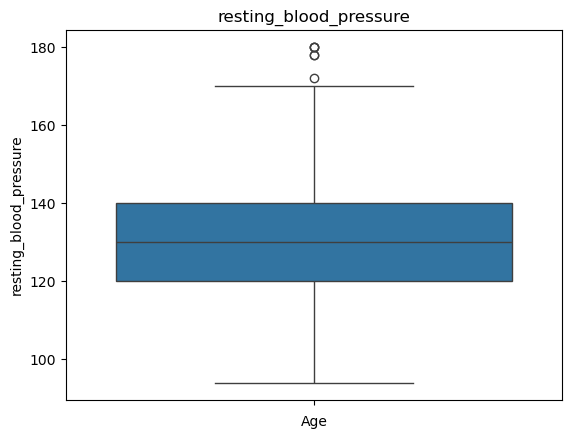

In [283]:
#Numerical Features
#resting_blood_pressure
sns.boxplot(y=data_combined['resting_blood_pressure'])
plt.title('resting_blood_pressure')
plt.xlabel('Age')
plt.show()

- The median resting blood pressure in the patients is around 130.
- There are few patients with very high blood pressure at resting , which beyond 160.

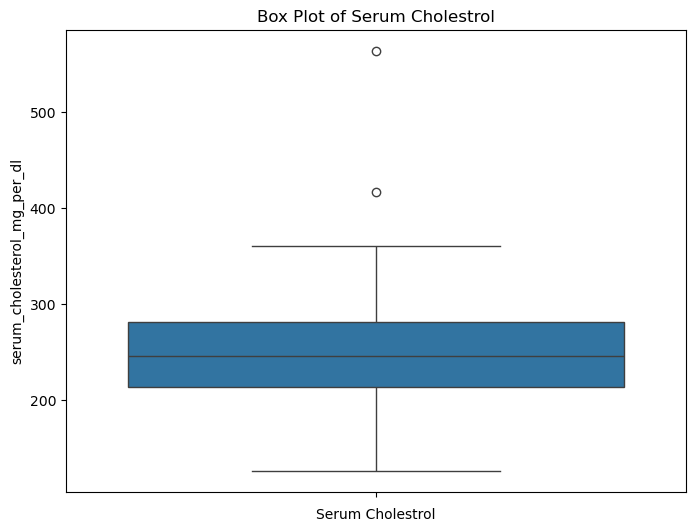

In [285]:
#For serum Cholestrol
plt.figure(figsize=(8,6))
sns.boxplot(y=data_combined['serum_cholesterol_mg_per_dl'])
plt.title('Box Plot of Serum Cholestrol')
plt.xlabel('Serum Cholestrol')
plt.show()

- The plot is skewed indicating the serum cholestrol level of patients are within the range of 200- 300 mg per dl
- There is few outliers with extremely high level of serum cholestrol beyond 500.

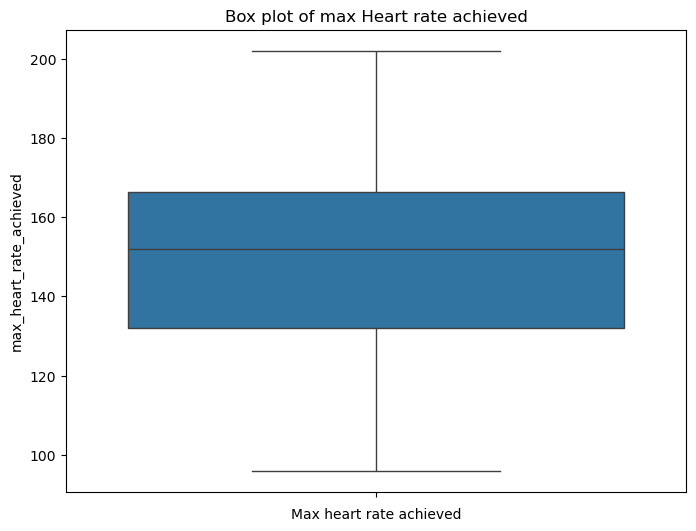

In [287]:
#Mx heart rate acheived
plt.figure(figsize=(8,6))
sns.boxplot(y=data_combined['max_heart_rate_achieved'])
plt.title('Box plot of max Heart rate achieved')
plt.xlabel('Max heart rate achieved')
plt.show()

- There are no outliers present in teh data for the patients with max heart rate.

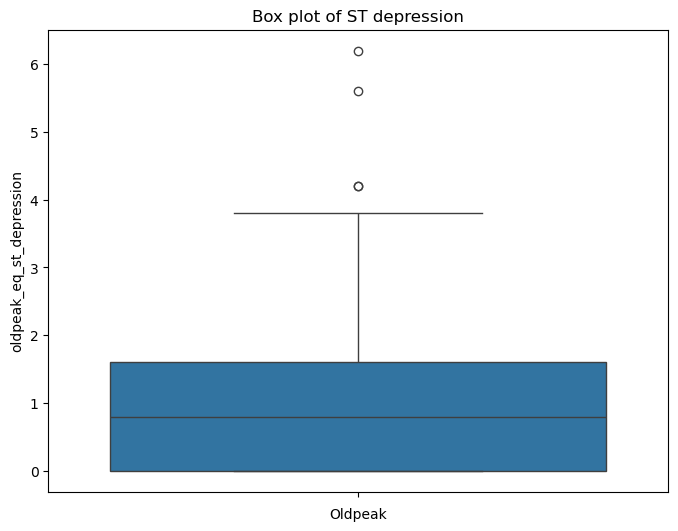

In [289]:
#Old peak (ST Depression)
plt.figure(figsize=(8,6))
sns.boxplot(y=data_combined['oldpeak_eq_st_depression'])
plt.title('Box plot of ST depression')
plt.xlabel('Oldpeak')
plt.show()

- The box plot is highly skewed towards the botton , indicating larger no of patients have low ST depression during exercise.
- However few outlier indicate presence of risk among few patients.

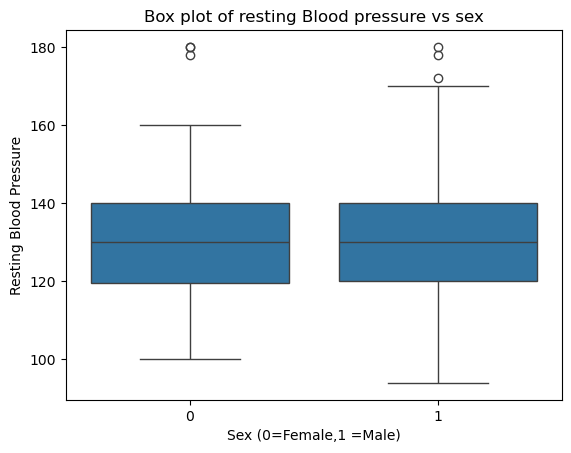

In [291]:
#Box plot for sex and blood pressure
sns.boxplot(x='sex',y='resting_blood_pressure',data=data_combined)
plt.title('Box plot of resting Blood pressure vs sex')
plt.xlabel('Sex (0=Female,1 =Male)')
plt.ylabel('Resting Blood Pressure')
plt.show()

- The resting blood pressure of male and female is almost same, with male having outliers extending upto 180.

  

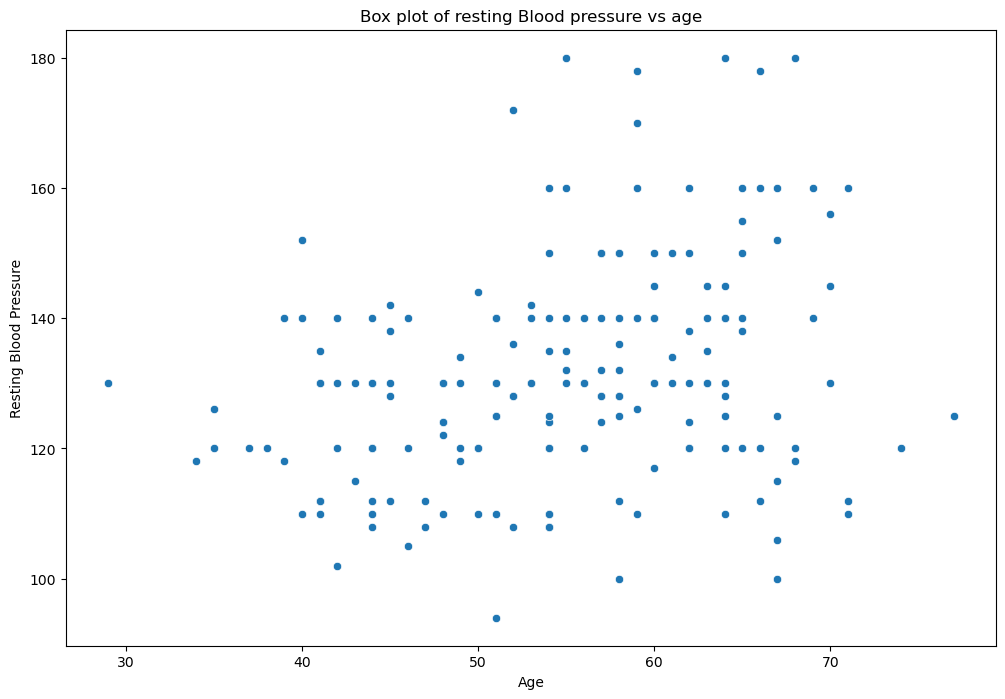

In [293]:
#Box plot for age and blood pressure
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='resting_blood_pressure',data=data_combined)
plt.title('Box plot of resting Blood pressure vs age')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()


- The plot shows slight increase in blood pressure , as age goes beyond 50.


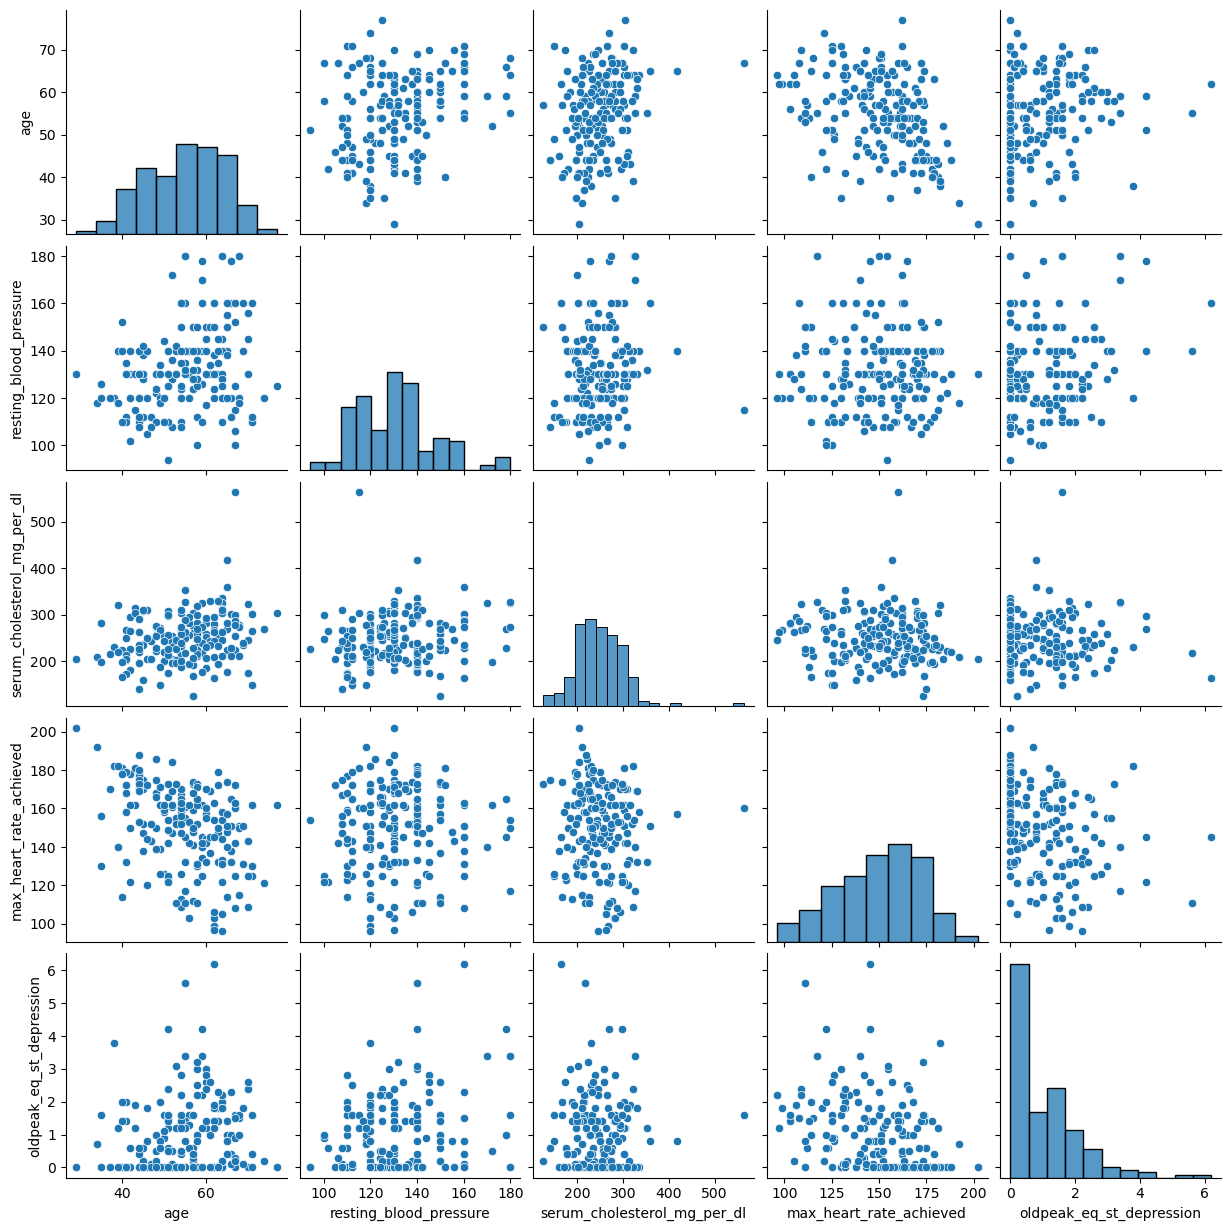

In [295]:
#pairplot for individual features
sns.pairplot(data_combined[['age','resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','oldpeak_eq_st_depression']])
plt.show()

- There is no specific correlation between the attributes in the pairplot, though few clusters can be observed in certain plots
- age vs serum cholestrol,serum cholestrol vs max peak etc.
- While histogram of all attributes are normally distributes, the old_peak_st_depression values are highly skewed.

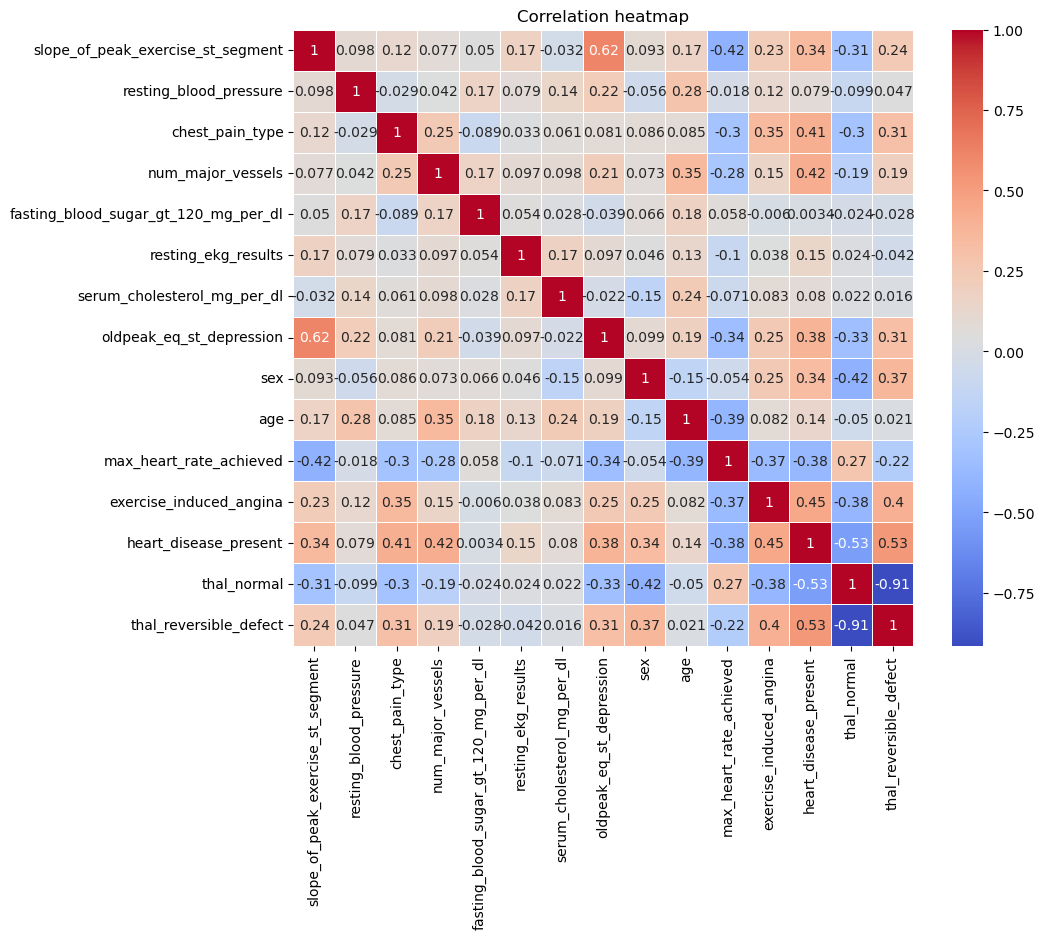

In [297]:
#Checking non numerical and numerical values in attributes
non_numeric=data_combined.select_dtypes(exclude=[np.number]).columns

#Dropping nonchat numeric from heatmap
data_numeric=data_combined.select_dtypes(include=[np.number])

#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

- Slightly igh correlation > 0.5between heart disease and thal reversible defect
- Slightly high correlation between slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression

### Insights
The exploratory analysis of heart disease dataset revealed several insights into various factors surrounding the disease.
The data revealed that the male poulation and those in the age above 50 are highly prone to the heart disease based on various results such as thallium stress results. resting ECG, chest pain types etc indicating need for critical care in diagnosis and treatment.
Also, several key insights on the presence of heart disease based on various factors were  identified which would help in giving a detailed suggestion ot the hospital.
`

## Model Selection and Training

In [301]:
#define features and target variable

X=data_combined.drop('heart_disease_present',axis=1)
y=data_combined['heart_disease_present']

#Split the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


X_train = X_train.drop(columns=['patient_id'], errors='ignore')
X_test = X_test.drop(columns=['patient_id'], errors='ignore')

#Standardizing the feature values
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Logistic Regression

In [303]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log=log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_log))

Confusion Matrix:
[[15  1]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



### Decision Tree Classifier


In [305]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt=dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_dt))

Confusion Matrix:
[[15  1]
 [ 6 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



### Random Forest Classifier

In [307]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)


y_pred_rf=dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_rf))



Confusion Matrix:
[[15  1]
 [ 6 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



### Support Vector Machine

In [309]:
svm_model=SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm=svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_svm))

Confusion Matrix:
[[16  0]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



### Gradient Boosting Classifier


In [311]:
gb_model= GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train,y_train)

y_pred_gb=gb_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_svm))

Confusion Matrix:
[[16  0]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



### Model Comparison

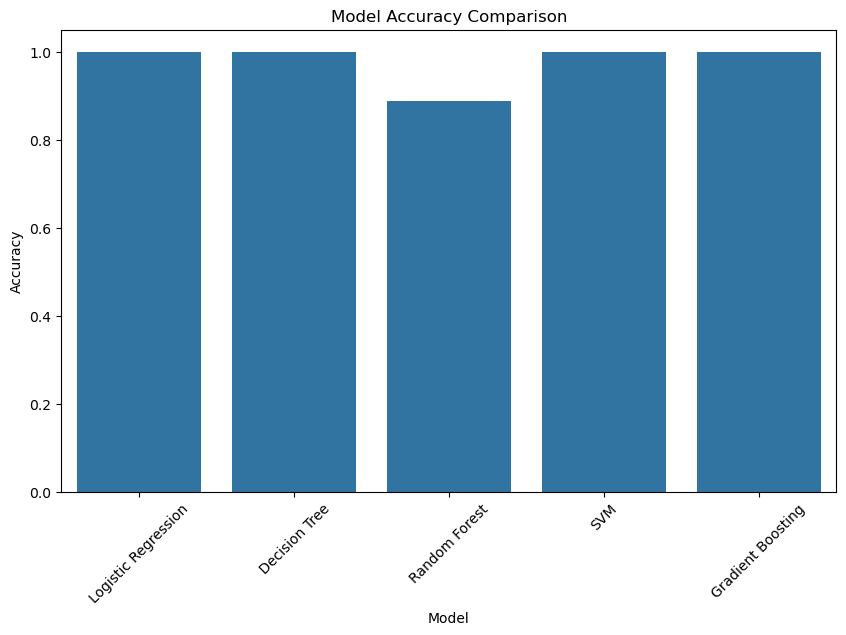

In [313]:
results={'Model':['Logistic Regression',' Decision Tree','Random Forest','SVM','Gradient Boosting'],'Accuracy':
         [log_reg.score(X_test,y_pred_log),dt_model.score(X_test,y_pred_dt),rf_model.score(X_test,y_pred_rf),
          svm_model.score(X_test,y_pred_svm),gb_model.score(X_test,y_pred_gb)]}

result_df=pd.DataFrame(results)

plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Accuracy',data=result_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


In [314]:
result_df

,Model,Accuracy
0,Logistic Regression,1.000000
1,Decision Tree,1.000000
2,Random Forest,0.888889
3,SVM,1.000000
4,Gradient Boosting,1.000000


- Need to check for overfitting since the prediction score is 1.

In [316]:
models={"Logistic Regression": LogisticRegression(),"Decision tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),"Support Vector Machine":SVC(),
        "Gradient Boosting": GradientBoostingClassifier()}



In [317]:
for name,model in models.items():
    print(f"Training {name}...")
    model.fit(X_train,y_train)
    train_accuracy=accuracy_score(y_train,model.predict(X_train))
    test_accuracy=accuracy_score(y_test,model.predict(X_test))
    print(f"{name}-Training Accuracy:{train_accuracy *100:.2f}%")
    print(f"{name}-Test Accuracy:{test_accuracy *100:.2f}%")
    print("-"*50)

Training Logistic Regression...
Logistic Regression-Training Accuracy:85.42%
Logistic Regression-Test Accuracy:83.33%
--------------------------------------------------
Training Decision tree...
Decision tree-Training Accuracy:100.00%
Decision tree-Test Accuracy:75.00%
--------------------------------------------------
Training Random Forest...
Random Forest-Training Accuracy:100.00%
Random Forest-Test Accuracy:80.56%
--------------------------------------------------
Training Support Vector Machine...
Support Vector Machine-Training Accuracy:93.06%
Support Vector Machine-Test Accuracy:86.11%
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting-Training Accuracy:100.00%
Gradient Boosting-Test Accuracy:77.78%
--------------------------------------------------


In [318]:
 X = data_combined.drop(['patient_id'], axis=1)

In [319]:
import warnings
warnings.filterwarnings("ignore")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - Cross-Validation Scores: {scores}")
    print(f"{name} - Mean Cross-Validation Score: {scores.mean() * 100:.2f}%")
    

Logistic Regression - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Logistic Regression - Mean Cross-Validation Score: 100.00%
Decision tree - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Decision tree - Mean Cross-Validation Score: 100.00%
Random Forest - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest - Mean Cross-Validation Score: 100.00%
Support Vector Machine - Cross-Validation Scores: [0.58333333 0.63888889 0.58333333 0.58333333 0.58333333]
Support Vector Machine - Mean Cross-Validation Score: 59.44%
Gradient Boosting - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Gradient Boosting - Mean Cross-Validation Score: 100.00%


### Choosing the best model

- Logistic Regression, Decision Tree, Random Forest, Gradient Boosting have *cross validation* scores of 100 meaning they are high performing, assuming they are not overfitted.
- Decision Tree (100% training accuracy, 77.78% test accuracy): The large gap between training and test accuracy shows that the model is overfitting.
- Random Forest (100% training, 86.11% test): While it performs well on the test data, it may still be overfitting slightly due to the perfect training accuracy.
- Gradient Boosting (100% training, 75.00% test): Also shows signs of overfitting, with a large performance gap.
- Logistic Regression (85.42% training, 83.33% test): This model has a small accuracy gap between training and test data, indicating a good balance between fitting the training data and generalizing to the test data.

### Hyperparameter tuning

In [323]:
log_reg=LogisticRegression() 

#set up parameter grid
param_grid={
    'C':[0.01,0.1,1,10,100],
    'solver':['liblinear','lbfgs']}

#Perform grid search with cross validation
grid_search=GridSearchCV(log_reg,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

#Best ones
print(f"Best Paramters:{grid_search.best_params_}")
print(f"Best Score:{grid_search.best_score_:.2f}")

Best Paramters:{'C': 0.1, 'solver': 'liblinear'}
Best Score:0.85


#### Model Training`

In [325]:
best_model=LogisticRegression(C=0.1,solver='liblinear')

best_model.fit(X_train,y_train)

train_accuracy=accuracy_score(y_train,best_model.predict(X_train))
test_accuracy=accuracy_score(y_test,best_model.predict(X_test))

print(f"Training Accuracy:{train_accuracy *100:.2f}%")
print(f"Test Accuracy:{test_accuracy*100:.2f}%")

Training Accuracy:84.72%
Test Accuracy:83.33%


#### Model Evaluation

In [327]:
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



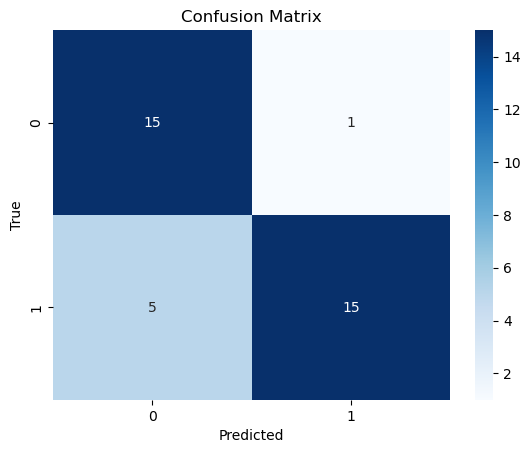

In [328]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Suggestions to the Hospital
Based on the data analysis and model prediction, following are the suggestions to the hospital
- Identify persons that are at risk for the heart disease and provide preventive care for them in early stages.
- Prioritize and allocate resources to the patients who need it most and give personalised treatment based on their treatment plans.
- Provide free screening and education to people who may be at high risk due to lifestyle and provide awareness classes on prevention of heart disease